In [ ]:
%cd ..

In [3]:
import import_ipynb
import numpy as np
from data_preprocessing import split_working_faulty_blocks, train_test_split_with_reshape, time_chunks_split

importing Jupyter notebook from data_preprocessing.ipynb


In [22]:
working_blocks_df, faulty_blocks_df = split_working_faulty_blocks(True)

learning_rate=0.0005
chunk_size=8

In [23]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[21, 9])


def create_confusion_matrix(predictions, y):
  confusion_matrix=np.zeros((2, 2))

  for i in range(len(predictions)):
    class_prediction = 0
    if predictions[i] >= 0.5:
      class_prediction = 1

    if class_prediction == y[i]:
      confusion_matrix[class_prediction][class_prediction] += 1
    else:
      confusion_matrix[(class_prediction + 1) % 2][class_prediction] += 1

  return confusion_matrix


def plot_results(accuracy, loss, confusion_matrix):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10), gridspec_kw={'width_ratios': [2, 1]})

  ax1.plot(accuracy)
  ax1.plot(loss)
  ax1.set(xlabel='epochs', ylabel='accuracy & loss')

  ax1.legend(['accuracy', 'loss'], loc='center right')
  sns.heatmap(confusion_matrix, annot=True, ax=ax2)



def test_model(model, optimizer, callbacks=[], epochs=200):
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  X, y = time_chunks_split(working_blocks_df, faulty_blocks_df, chunk_size=chunk_size)
  X_train, X_test, y_train, y_test = train_test_split_with_reshape(X, y)

  history = model.fit(X_train, y_train, epochs=epochs, callbacks=callbacks, verbose=0)

  accuracy = history.history['accuracy']
  loss = history.history['loss']
  predictions = model.predict(X_test)

  confusion_matrix = create_confusion_matrix(predictions, y_test)

  print(f'train accuracy: {accuracy[-1]}')
  print(f'test accuracy: {(confusion_matrix[0][0] + confusion_matrix[1][1]) / len(y_test) * 100}')

  plot_results(accuracy, loss, confusion_matrix)

<Figure size 1512x648 with 0 Axes>

In [6]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
import tensorflow as tf

train accuracy: 0.9838709831237793
test accuracy: 95.1923076923077


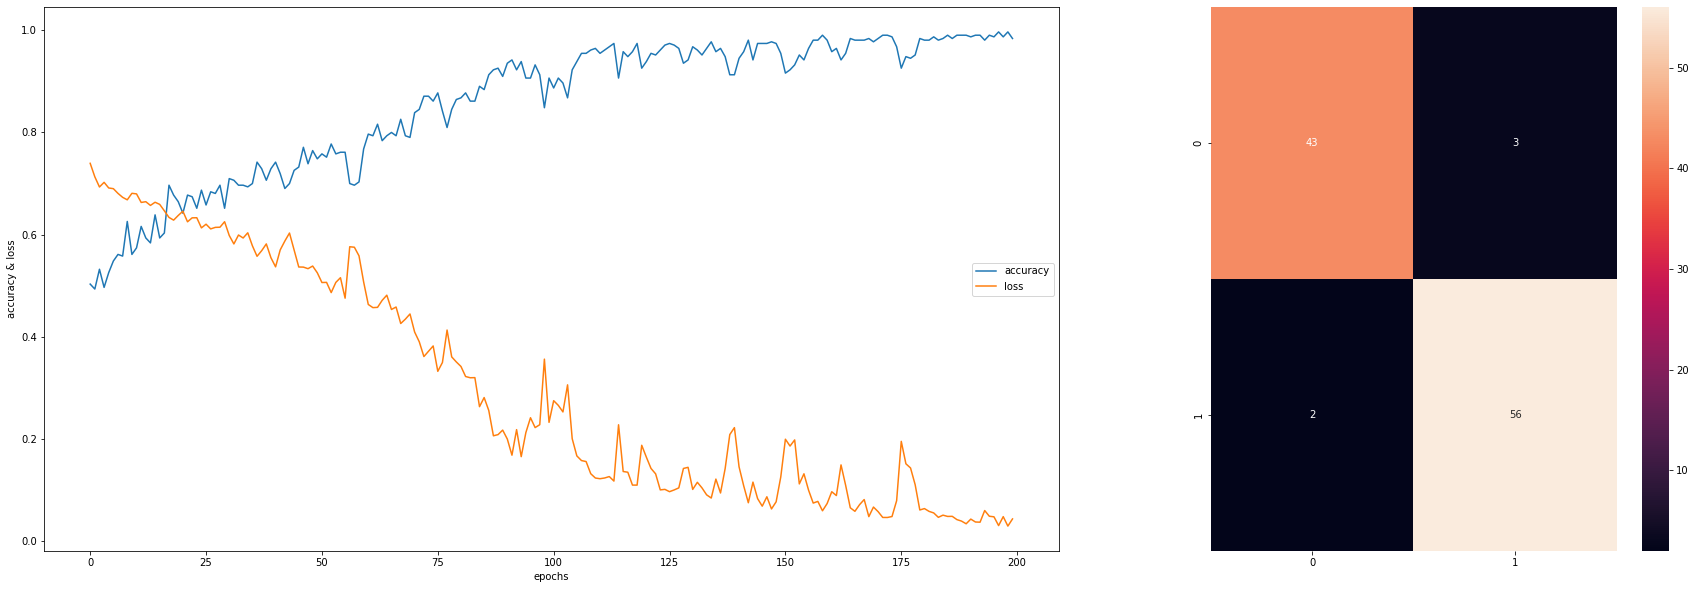

In [44]:
model = Sequential([
  SimpleRNN(64, input_shape=(chunk_size, 9), activation='relu', return_sequences=True),
  Dropout(0.4),
  SimpleRNN(8, activation='relu', return_sequences=False),
  Dense(units=1, activation=tf.keras.activations.sigmoid),  
])

opt = tf.optimizers.Adam(learning_rate=learning_rate)

test_model(model, opt)

train accuracy: 0.9709677696228027
test accuracy: 97.11538461538461


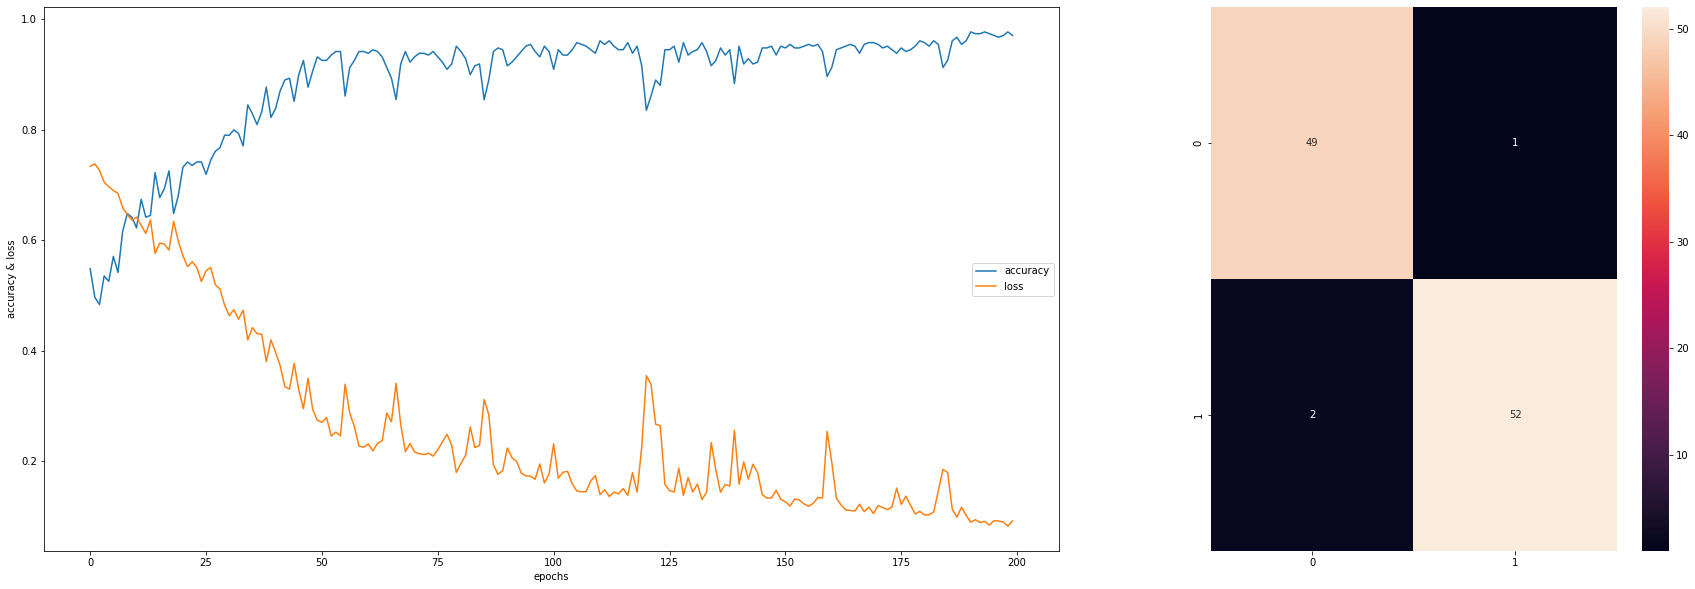

In [42]:
model = Sequential([
  SimpleRNN(64, input_shape=(chunk_size, 9), activation='tanh', return_sequences=True),
  Dropout(0.4),
  SimpleRNN(8, activation='tanh', return_sequences=False),
  Dense(units=1, activation=tf.keras.activations.sigmoid),  
])

opt = tf.optimizers.Adam(learning_rate=learning_rate)

test_model(model, opt)

train accuracy: 0.5129032135009766
test accuracy: 39.42307692307692


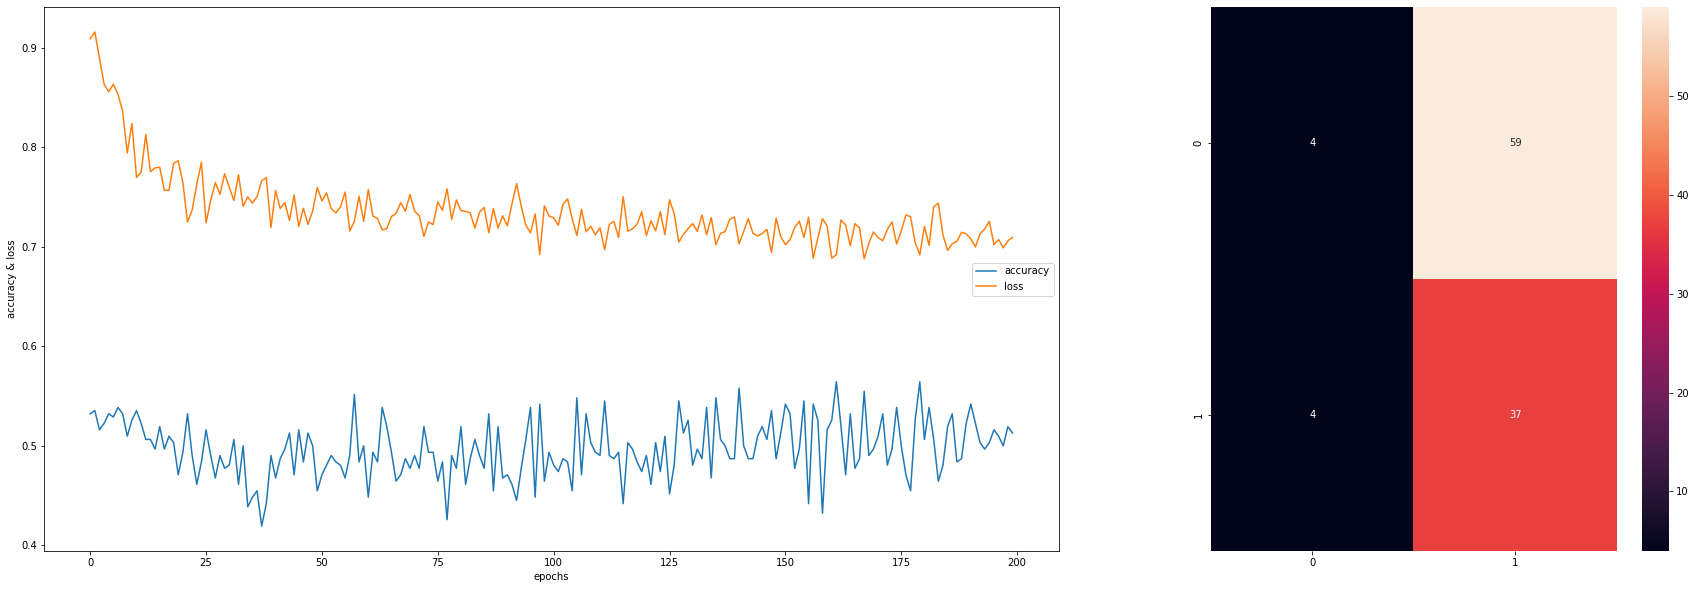

In [45]:
model = Sequential([
  SimpleRNN(64, input_shape=(chunk_size, 9), activation='tanh', return_sequences=True),
  Dropout(0.4),
  SimpleRNN(8, activation='tanh', return_sequences=False),
  Dense(units=1, activation=tf.keras.activations.sigmoid),  
])

opt = tf.optimizers.SGD(learning_rate=learning_rate)

test_model(model, opt)

train accuracy: 0.6548386812210083
test accuracy: 64.42307692307693


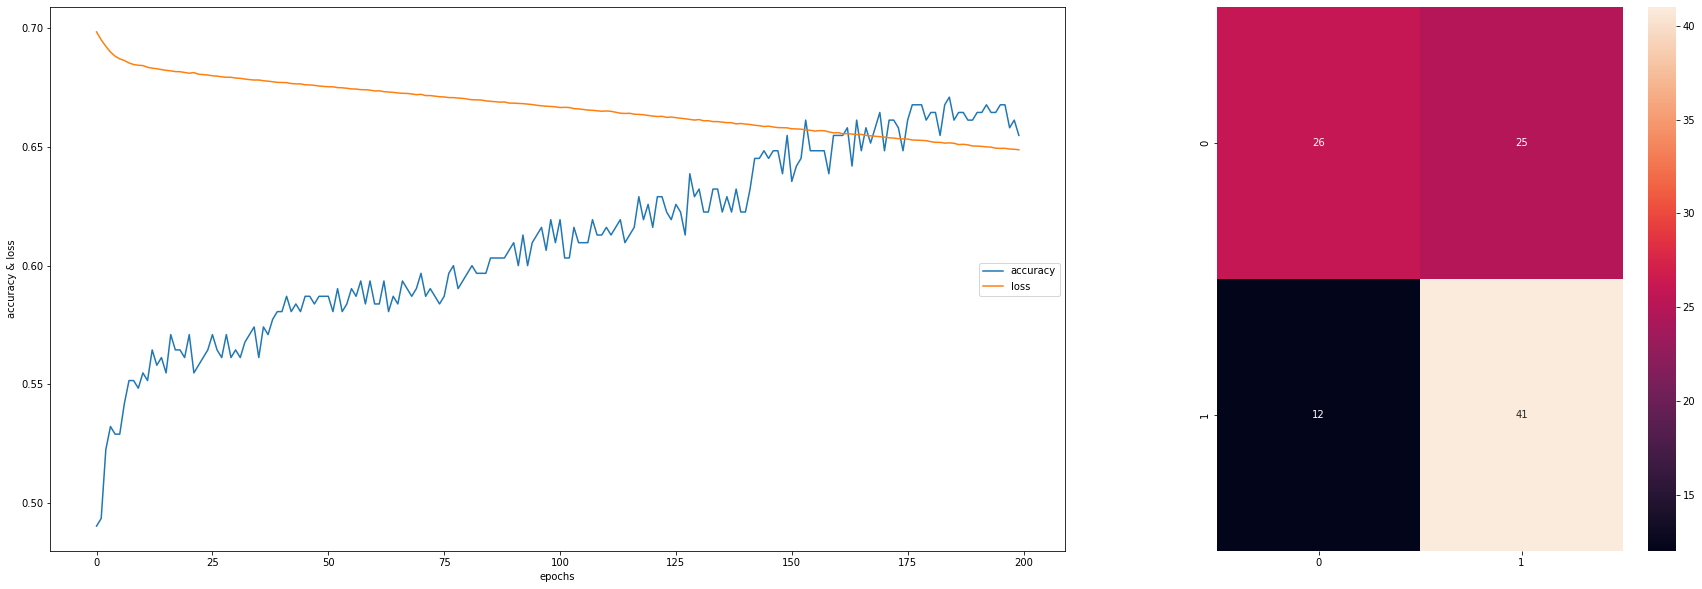

In [26]:
model = Sequential([
  SimpleRNN(64, input_shape=(chunk_size, 9), activation='tanh', return_sequences=True),
  SimpleRNN(8, activation='tanh', return_sequences=False),
  Dense(units=1, activation=tf.keras.activations.sigmoid),  
])

opt = tf.optimizers.SGD(learning_rate=learning_rate)

test_model(model, opt)

train accuracy: 0.9612902998924255
test accuracy: 95.1923076923077


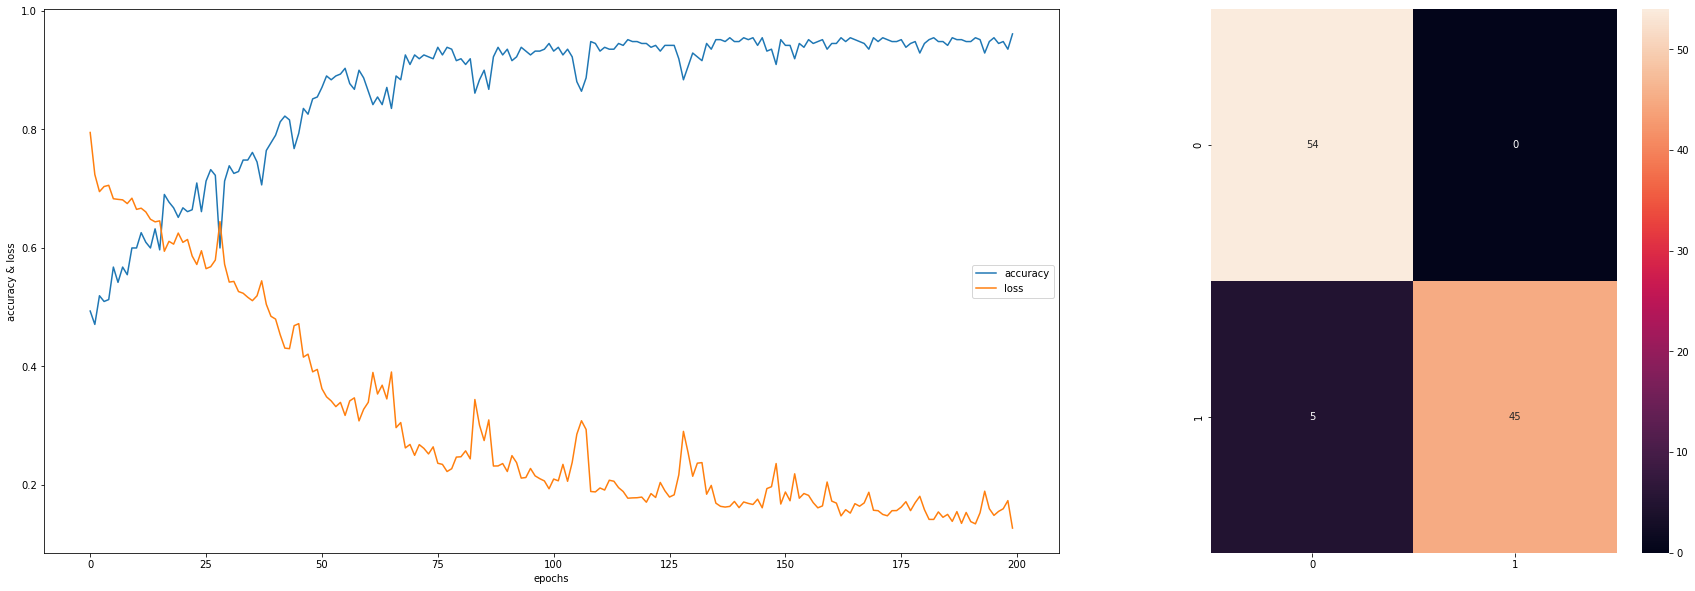

In [27]:
model = Sequential([
  SimpleRNN(64, input_shape=(chunk_size, 9), activation='tanh', return_sequences=True),
  Dropout(0.2),
  SimpleRNN(8, activation='tanh', return_sequences=False),
  Dense(units=1, activation=tf.keras.activations.sigmoid),  
])

opt = tf.optimizers.Adam(learning_rate=learning_rate)

test_model(model, opt)

train accuracy: 0.9354838728904724
test accuracy: 94.23076923076923


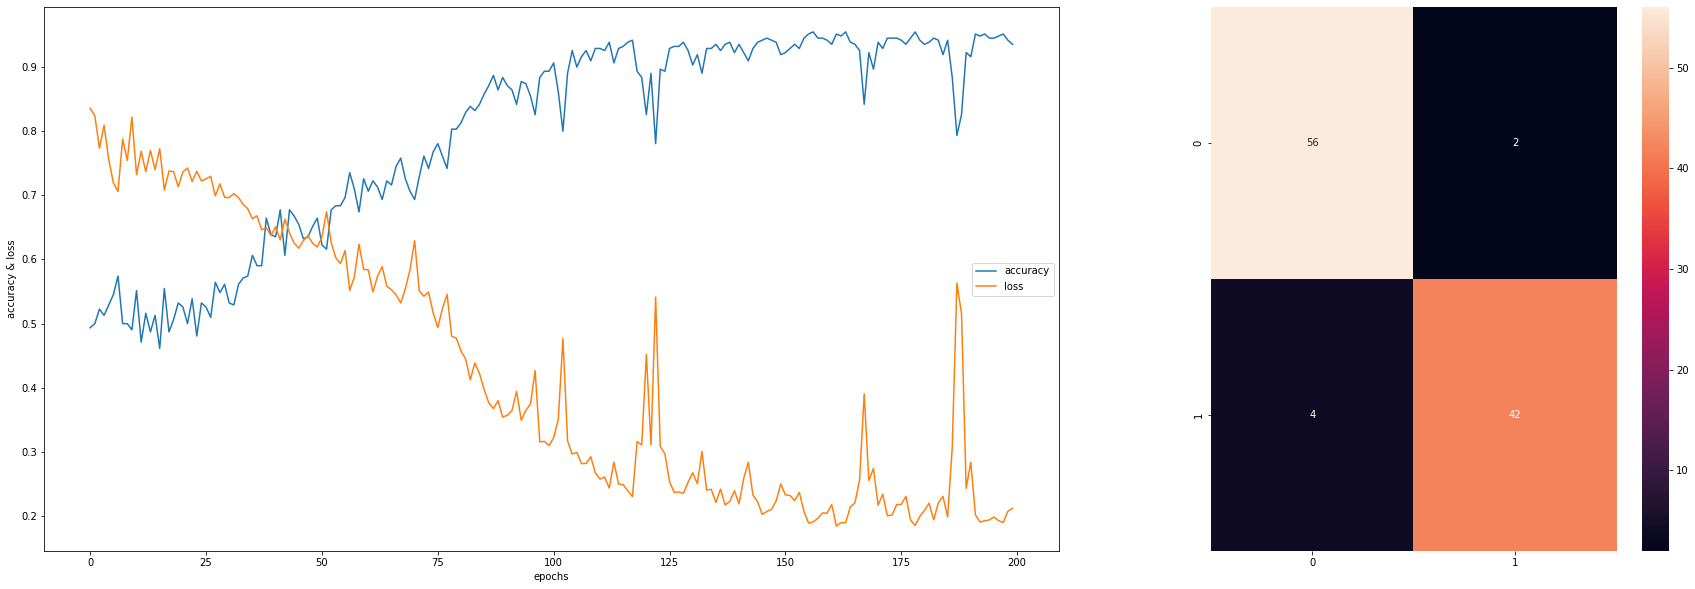

In [28]:
model = Sequential([
  SimpleRNN(64, input_shape=(chunk_size, 9), activation='tanh', return_sequences=True),
  Dropout(0.8),
  SimpleRNN(8, activation='tanh', return_sequences=False),
  Dense(units=1, activation=tf.keras.activations.sigmoid),  
])

opt = tf.optimizers.Adam(learning_rate=learning_rate)

test_model(model, opt)

train accuracy: 0.8612903356552124
test accuracy: 87.5


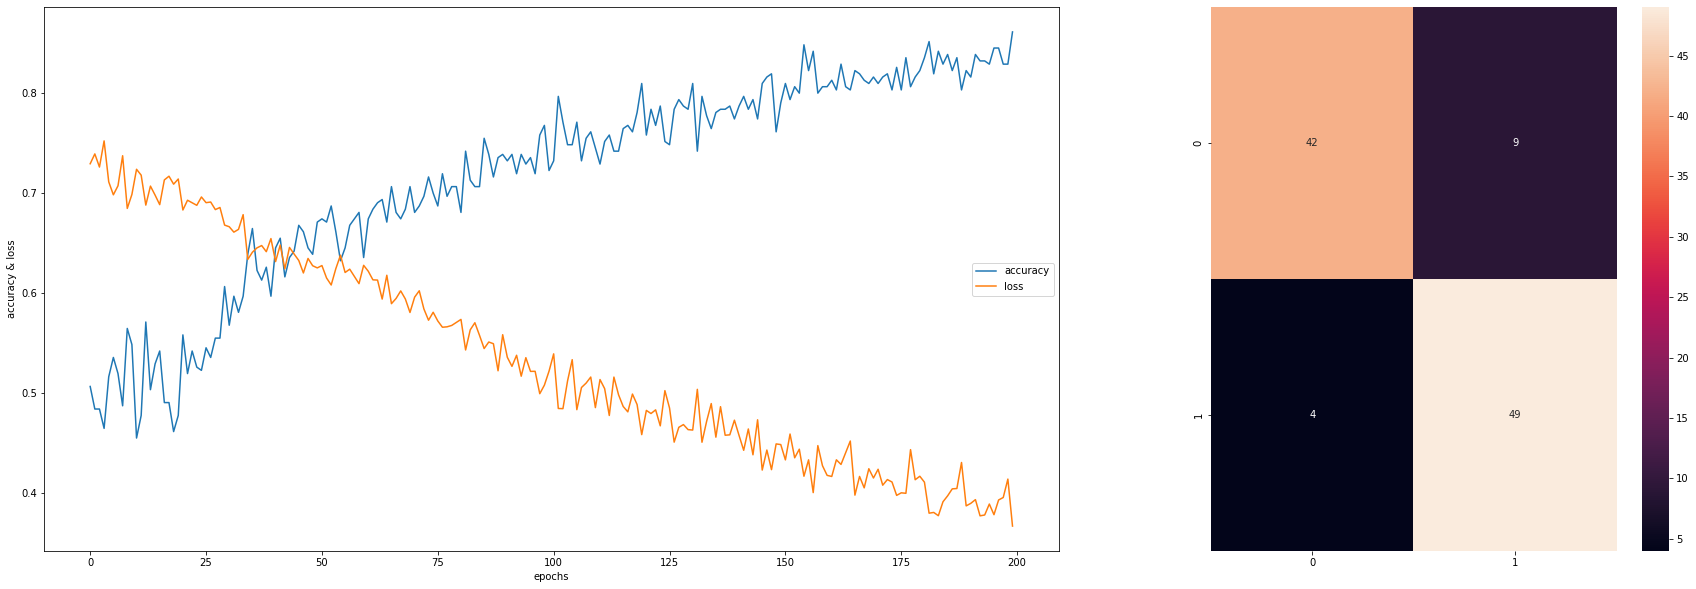

In [29]:
model = Sequential([
  SimpleRNN(8, input_shape=(chunk_size, 9), activation='tanh', return_sequences=True),
  Dropout(0.3),
  SimpleRNN(16, activation='tanh', return_sequences=True),
  Dropout(0.3),
  SimpleRNN(32, activation='tanh', return_sequences=False),
  Dense(units=1, activation=tf.keras.activations.sigmoid),  
])

opt = tf.optimizers.Adam(learning_rate=learning_rate)

test_model(model, opt)

train accuracy: 0.9161290526390076
test accuracy: 83.65384615384616


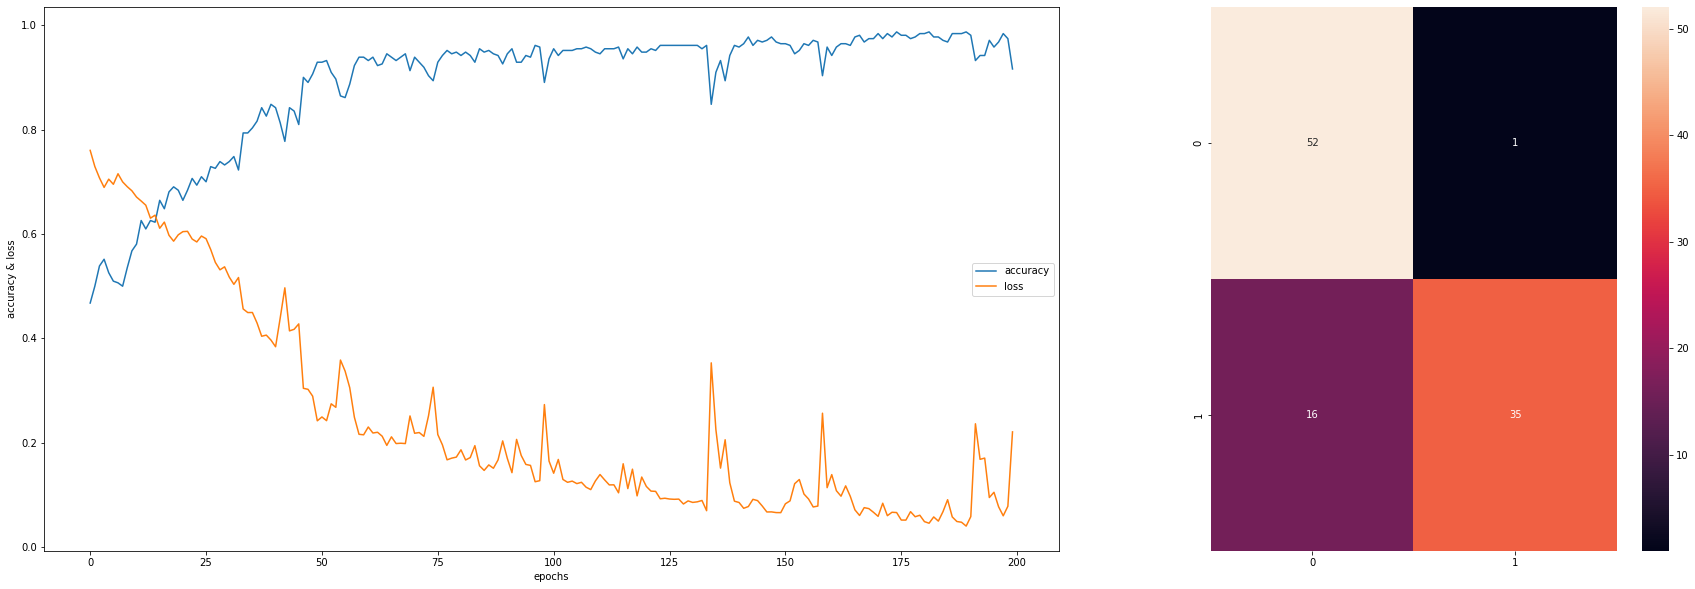

In [30]:
model = Sequential([
  SimpleRNN(64, input_shape=(chunk_size, 9), activation='tanh', return_sequences=True),
  Dropout(0.3),
  SimpleRNN(32, activation='tanh', return_sequences=True),
  Dropout(0.2),
  SimpleRNN(16, activation='tanh', return_sequences=False),
  Dense(units=1, activation=tf.keras.activations.sigmoid),  
])

opt = tf.optimizers.Adam(learning_rate=learning_rate)

test_model(model, opt)

train accuracy: 0.9451612830162048
test accuracy: 94.23076923076923


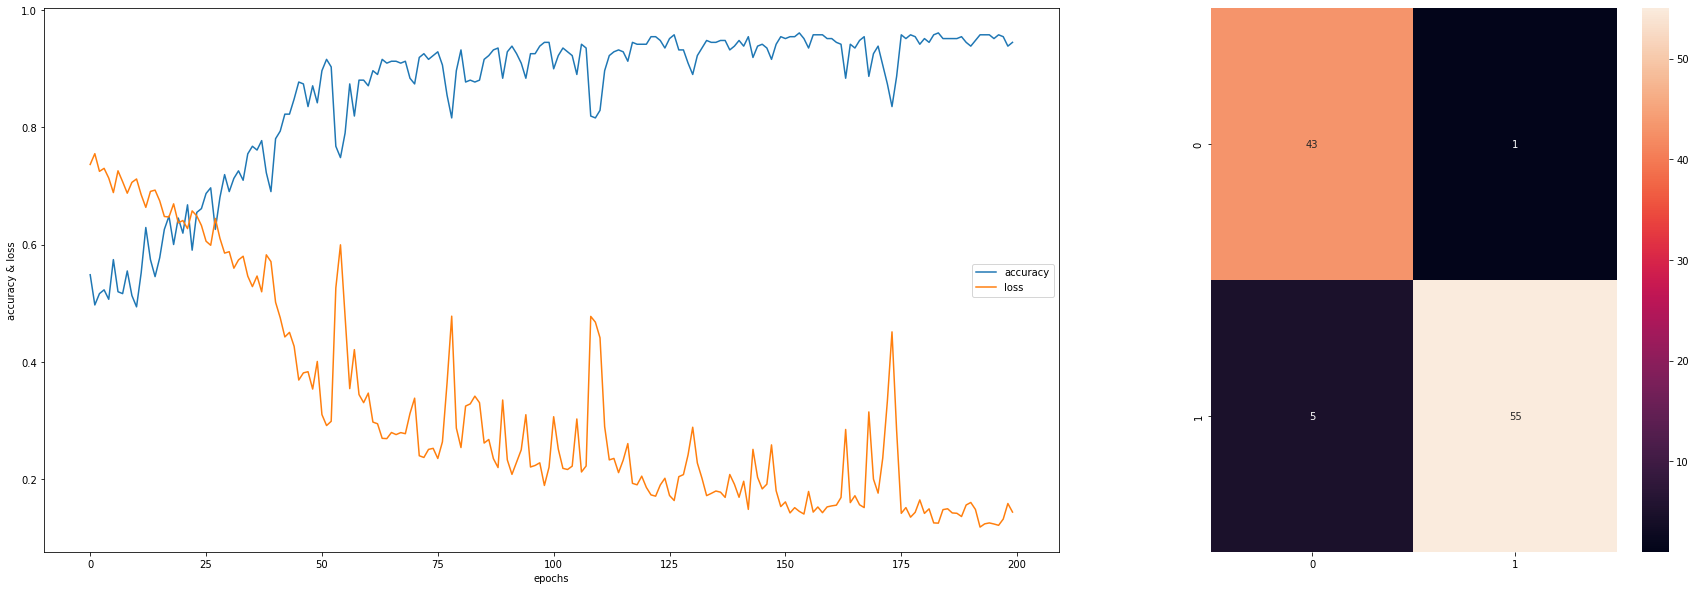

In [31]:
model = Sequential([
  SimpleRNN(64, input_shape=(chunk_size, 9), activation='tanh', return_sequences=True),
  Dropout(0.4),
  SimpleRNN(32, activation='tanh', return_sequences=True),
  Dropout(0.3),
  SimpleRNN(16, activation='tanh', return_sequences=True),
  Dropout(0.2),
  SimpleRNN(8, activation='tanh', return_sequences=False),
  Dense(units=1, activation=tf.keras.activations.sigmoid),  
])

opt = tf.optimizers.Adam(learning_rate=learning_rate)

test_model(model, opt)

train accuracy: 0.9612902998924255
test accuracy: 97.11538461538461


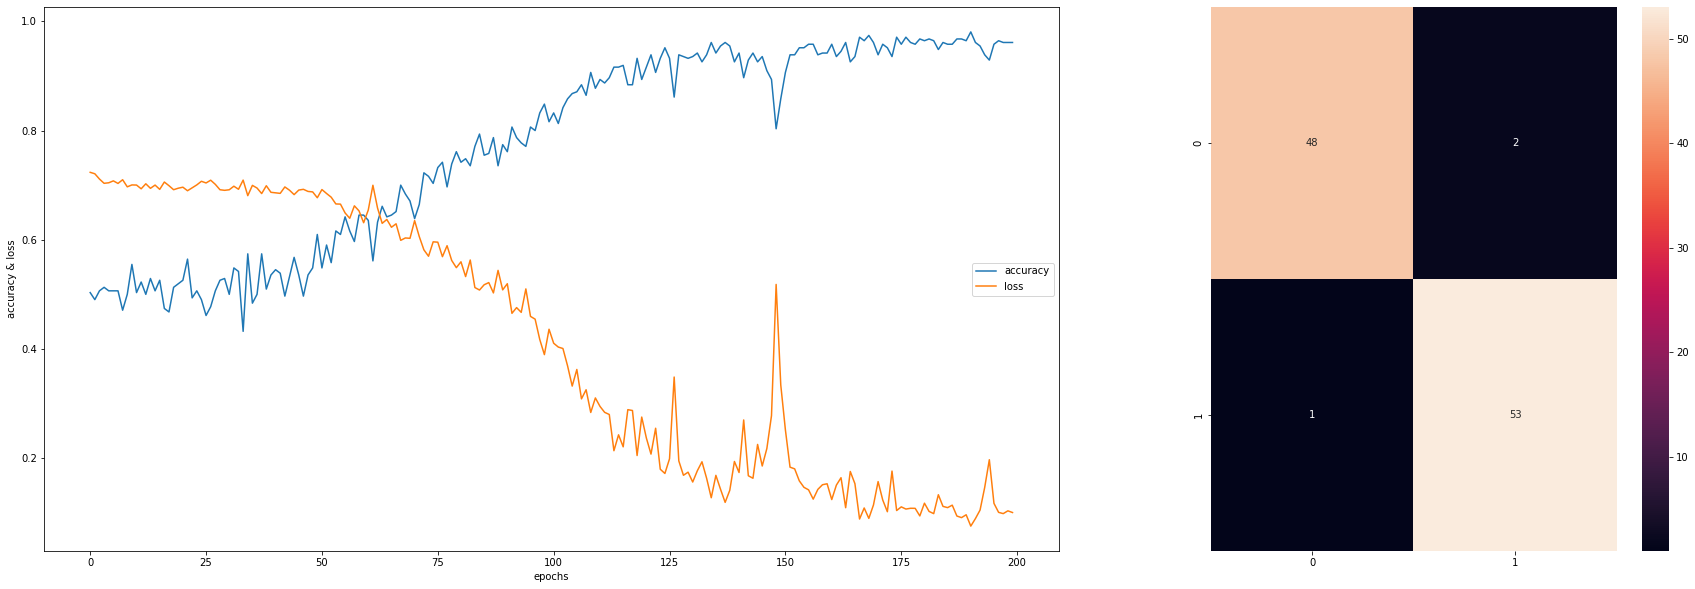

In [32]:
model = Sequential([
  SimpleRNN(64, input_shape=(chunk_size, 9), activation='relu', return_sequences=True),
  Dropout(0.4),
  SimpleRNN(32, activation='tanh', return_sequences=True),
  Dropout(0.2),
  SimpleRNN(32, activation='tanh', return_sequences=True),
  Dropout(0.1),
  SimpleRNN(64, activation='relu', return_sequences=False),
  Dense(units=1, activation=tf.keras.activations.sigmoid),  
])

opt = tf.optimizers.Adam(learning_rate=learning_rate)

test_model(model, opt)